<a href="https://colab.research.google.com/github/biorsrch18/Computer-vision/blob/main/CV_Project_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization


import os
import random
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer # convert categorical labels into a binary format

# Tensorflow modules
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data augmentation
from tensorflow.keras.callbacks import ReduceLROnPlateau #reducing the learning rate
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing import image

import cv2 # Importing openCV for image processing

from google.colab.patches import cv2_imshow


## Loading the dataset

In [6]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
images = np.load('/content/drive/MyDrive/computer_vision/Plant_Images.npy')
labels = pd.read_csv('/content/drive/MyDrive/computer_vision/Plant_Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [8]:
print(images.shape)
print(labels.shape)
print ("The number of RGB images are:", images.shape[0])
print ("The shape of images are:", images[0].shape)
print ("The number of channels are:", images[0].shape[2])

(4750, 128, 128, 3)
(4750, 1)
The number of RGB images are: 4750
The shape of images are: (128, 128, 3)
The number of channels are: 3


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [9]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

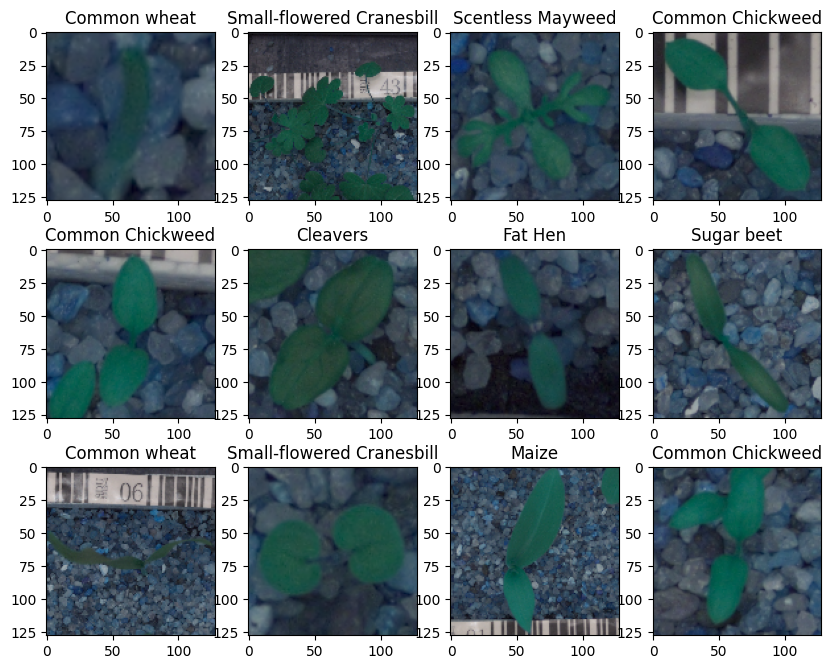

In [10]:
plot_images(images,labels)

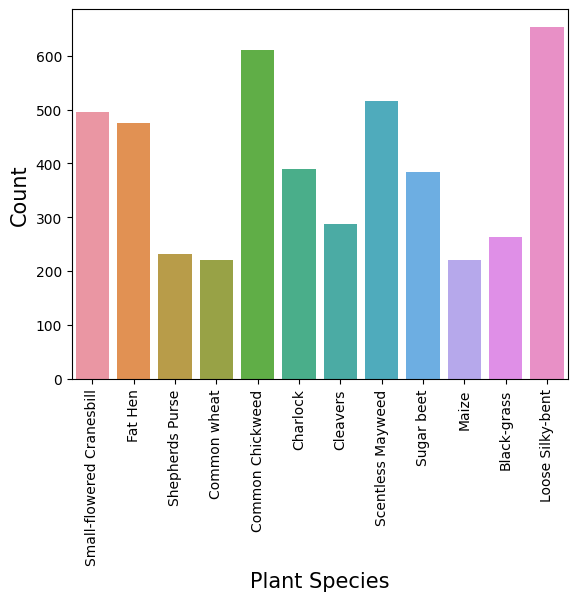

In [11]:
# countplot to understand the distribution of the target variable.
sns.countplot(labels['Label'])
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Plant Species", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

# Observations
    The dataset appears to be unbalanced in the above plot.
    Common Chickweed, Scentless Mayweed and Loose Silky-bent plant species have around more than 500 images indivially.
    There are between 400 and 500 images for each Small-flowered Cranebill and Fat Hen plant categories.
    There are between 300 and 400 images for each Charlock and Sugar beet categories.
    Shepherds Purse, Common wheat, Maize, Black-grass and Cleavers plant species have around 200 -300 images.


## Data Pre-Processing

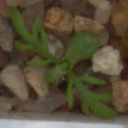

In [14]:
cv2_imshow(images[3000])

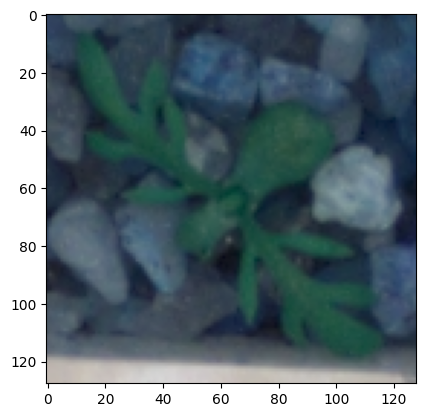

In [15]:
plt.imshow(images[3000])

#Observations:
    1.Since OpenCV reads images in BGR format, we can see that the images plot differently when we use OpenCV and Matplotlib.
    2.This indicates that OpenCV was used to generate the provided numpy arrays from the original images.
    3.To make it easier for us to understand, we will now convert these BGR images to RGB images.

### Convert the BGR images to RGB images.

In [16]:
# convert the images from BGR to RGB using cvtColor() of OpenCV library
for i in range(len(images)): images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

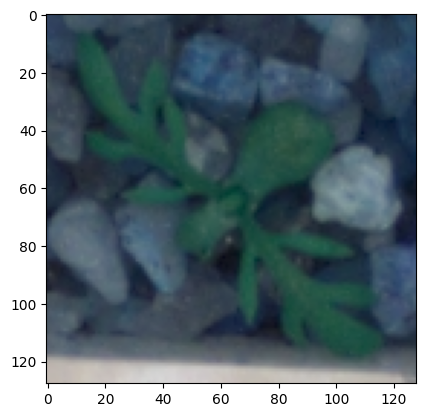

In [17]:
plt.imshow(cv2.cvtColor(images[3000], cv2.COLOR_BGR2RGB))

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

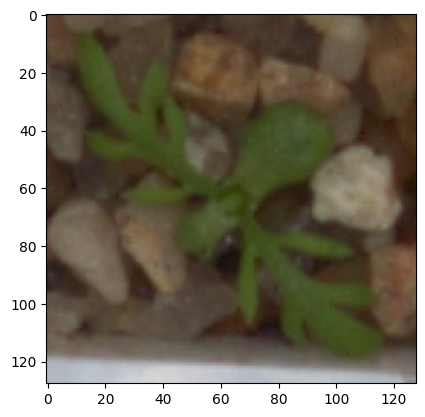

In [18]:
plt.imshow(images[3000])

In [19]:
images_decreased=[]
height = 64
weight =64
dimension = (height, weight)
for i in range(len(images)):
    images_decreased.append(cv2.resize(images[i],(64,64), interpolation=cv2.INTER_LINEAR))

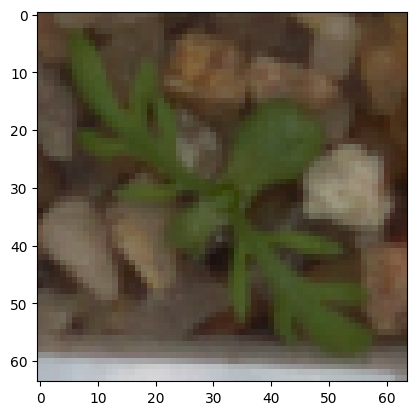

In [20]:
#image after resizing
plt.imshow(images_decreased[3000])

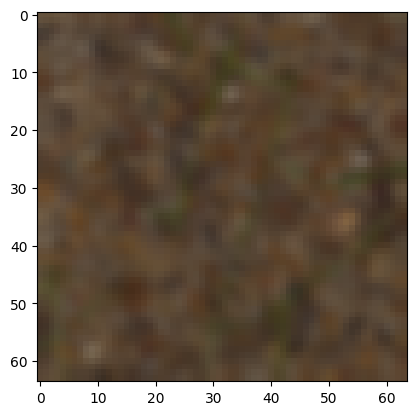

In [21]:
# Using Guassian Blur to denoise the image
image_gsb=[]
for i in range(len(images_decreased)):
    image_gsb.append(cv2.GaussianBlur(images_decreased[i], (5, 5), 0))
    plt.imshow(image_gsb[i])

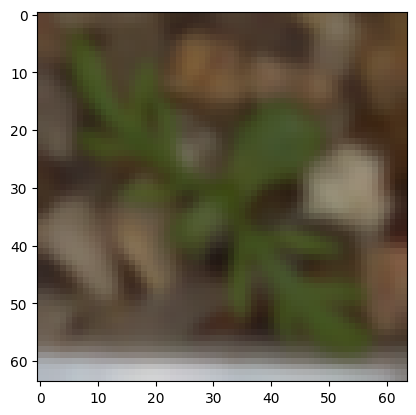

In [22]:
plt.imshow(image_gsb[3000])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

    #Split data using train_test_split() from scikit-learn into 3 parts : train,test and validation.
    Train set: 70%
    Test & Validation set: 30%

In [23]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels['Label'], test_size=0.15, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42, stratify=y_temp)

In [24]:
print("Shape of Training set : ", X_train.shape, y_train.shape)
print("Shape of Test set : ", X_test.shape, y_test.shape)
print("Shape of Validation set : ", X_val.shape, y_val.shape)

Shape of Training set :  (3431, 64, 64, 3) (3431,)
Shape of Test set :  (713, 64, 64, 3) (713,)
Shape of Validation set :  (606, 64, 64, 3) (606,)


### Encode the target labels

In [25]:
# Labelbinarizer to convert categorical labels into a binary format
enc = LabelBinarizer()
y_train_en = enc.fit_transform(y_train)
y_test_en = enc.fit_transform(y_test)
y_val_en = enc.fit_transform(y_val)

### Data Normalization

In [26]:
# to standardize the images we will use scaling method.
X_train_norm = X_train.astype('float32')/255.0
X_test_norm = X_test.astype('float32')/255.0
X_val_norm = X_val.astype('float32')/255.0

In [27]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(X_val_norm.shape)

(3431, 64, 64, 3)
(713, 64, 64, 3)
(606, 64, 64, 3)


## Model Building
    CNN Model with the following 2 main parts-
    The Feature Extraction layers which are comprised of convolutional and pooling layers.
    The Fully Connected classification layers for prediction.

#    Model_0
    1st conv layer (I/P layer 64 neurons, kernel size 3x3 with  with relu activation function and
    He initialization: for ReLU activations to help with weight distribution.
    2 maxpooling layers
    2 Dense layers
    2 Dropouts

In [28]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [29]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [30]:
model_0 = Sequential() #Initialize sequential model
model_0.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3))) # Adding first conv layer, Weight initialization, padding.
model_0.add(MaxPooling2D((2, 2), padding='same')) # Adding max pooling to reduce the size of output of first conv layer

model_0.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Adding second conv layer, Weight initialization, padding.
model_0.add(MaxPooling2D((2, 2), padding='same'))

model_0.add(Flatten()) # flattening the output of the conv layer after max pooling to make it ready for creating dense connections

model_0.add(Dense(64, activation='relu', kernel_initializer='he_uniform')) # Adding first dense layer with 64 neurons
model_0.add(Dropout(0.25))

model_0.add(Dense(32, activation='relu', kernel_initializer='he_uniform')) # Adding second dense layer with 32 neurons
model_0.add(Dropout(0.25))

model_0.add(Dense(12, activation='softmax')) # Adding output layer with 12 neurons
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                5

In [31]:
# Optimizer = Adam
optimizer = Adam(learning_rate=0.001)
optimizer= keras.optimizers.Adam()
model_0.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [32]:
# Fitting the model on the train data
history_0 = model_0.fit(X_train_norm, y_train_en, validation_data=(X_val_norm, y_val_en), epochs=50, batch_size=32, verbose=2)

Epoch 1/50
108/108 - 41s - loss: 2.4692 - accuracy: 0.1218 - val_loss: 2.4331 - val_accuracy: 0.1403 - 41s/epoch - 382ms/step
Epoch 2/50
108/108 - 34s - loss: 2.4348 - accuracy: 0.1291 - val_loss: 2.4159 - val_accuracy: 0.1650 - 34s/epoch - 318ms/step
Epoch 3/50
108/108 - 36s - loss: 2.3956 - accuracy: 0.1600 - val_loss: 2.2202 - val_accuracy: 0.2838 - 36s/epoch - 329ms/step
Epoch 4/50
108/108 - 35s - loss: 1.9742 - accuracy: 0.3323 - val_loss: 1.6267 - val_accuracy: 0.4604 - 35s/epoch - 325ms/step
Epoch 5/50
108/108 - 37s - loss: 1.6548 - accuracy: 0.4252 - val_loss: 1.6745 - val_accuracy: 0.4389 - 37s/epoch - 341ms/step
Epoch 6/50
108/108 - 36s - loss: 1.5163 - accuracy: 0.4792 - val_loss: 1.2948 - val_accuracy: 0.5726 - 36s/epoch - 330ms/step
Epoch 7/50
108/108 - 35s - loss: 1.3939 - accuracy: 0.5074 - val_loss: 1.2755 - val_accuracy: 0.5677 - 35s/epoch - 319ms/step
Epoch 8/50
108/108 - 36s - loss: 1.2903 - accuracy: 0.5506 - val_loss: 1.2711 - val_accuracy: 0.5842 - 36s/epoch - 330

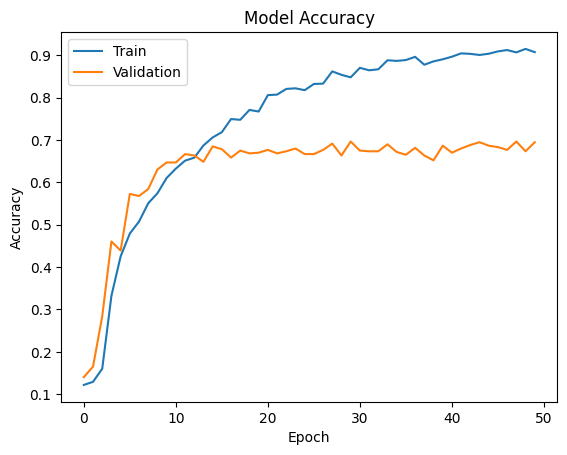

In [33]:
plt.plot(history_0.history['accuracy'], label='accuracy')
plt.plot(history_0.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [34]:
#Evaluate model on test data
accuracy = model_0.evaluate(X_test_norm, y_test_en, verbose=2)

23/23 - 2s - loss: 1.7442 - accuracy: 0.6886 - 2s/epoch - 68ms/step


    Total params: 547084 (2.09 MB)
    Trainable params: 547084 (2.09 MB)
    At epoch=50, training accuracy is 90% and validation accuracy is 68% which shows overfitted data

# Observations_Model_0
    Our model has 548,140 trainable parameters.
    After running 50 epochs, **we were able to achieve a training accuracy of ~90% and a validation accuracy of ~68%.
    The model seems to overfit on the data
    The model is performing somewhat poorly due to only ~66% of accuracy.

In [35]:
# Generate prediction using test data
y_pred_model_0 = model_0.predict(X_test_norm)
y_pred_model_0

23/23 [==============================] - 2s 60ms/step


array([[9.9885476e-01, 9.8297966e-22, 3.2037230e-21, ..., 1.3654319e-33,
        1.2270489e-21, 4.7958469e-17],
       [6.9408953e-02, 8.5020583e-16, 2.2370064e-14, ..., 1.0666216e-21,
        4.2759558e-14, 9.9575435e-12],
       [1.7555705e-11, 3.3391923e-05, 7.1670984e-05, ..., 1.2150777e-03,
        4.3918096e-09, 1.1091323e-05],
       ...,
       [3.5199727e-04, 1.9999376e-19, 1.1213227e-14, ..., 1.0825033e-22,
        3.0723877e-14, 2.5728909e-13],
       [4.8989172e-12, 2.2292941e-09, 3.0256811e-11, ..., 1.2076452e-04,
        1.7637811e-07, 4.8303758e-07],
       [4.9085088e-02, 7.0310634e-04, 1.0469023e-02, ..., 3.5584424e-04,
        4.7459587e-04, 1.1690116e-02]], dtype=float32)

In [36]:
## calculating categorical values from y_test_encoded and y_pred
y_pred_model_0=np.argmax(y_pred_model_0, axis=1)
y_test_arg=np.argmax(y_test_en, axis=1)

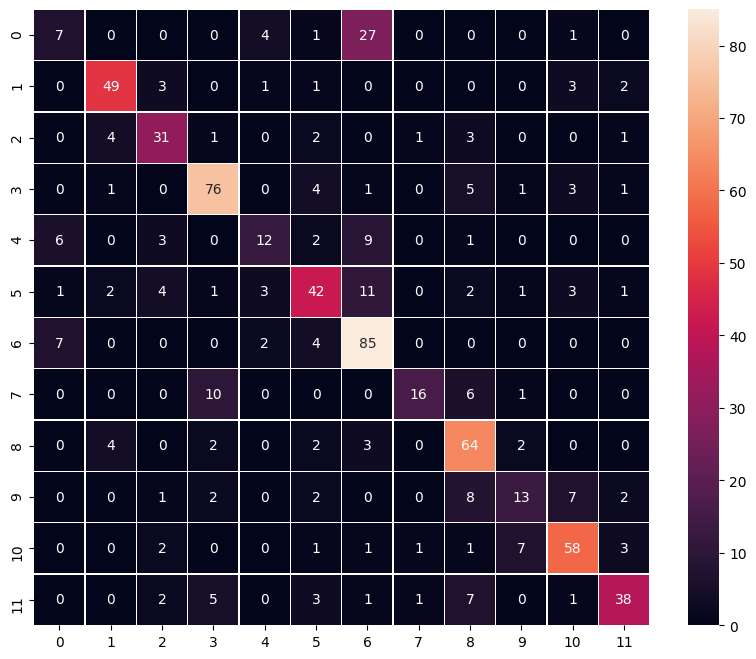

In [37]:
# Confusion matrix plot
cm = tf.math.confusion_matrix(y_test_arg,y_pred_model_0)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Observations
    We observe that some of the classes are not predicted correctly.
    Class 0 → Class 7 (29 errors) → This remains an issue, possibly due to feature similarity.
    Class 5 → Class 6 (9 errors) → Slightly reduced compared to before.
    Class 10 misclassified as Class 8 & 11 (fewer misclassifications than before).
    The other classes are performing relatively well.

# Model_1

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [38]:
# Code to monitor val_accuracy
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [39]:
history_m0 = model_0.fit(X_train_norm, y_train_en, validation_data=(X_val_norm, y_val_en), epochs=50, batch_size=32, verbose=2, callbacks=[lr_reduction])

Epoch 1/50
108/108 - 54s - loss: 0.2431 - accuracy: 0.9187 - val_loss: 1.7064 - val_accuracy: 0.6848 - lr: 0.0010 - 54s/epoch - 503ms/step
Epoch 2/50
108/108 - 34s - loss: 0.2427 - accuracy: 0.9169 - val_loss: 2.0892 - val_accuracy: 0.6848 - lr: 0.0010 - 34s/epoch - 315ms/step
Epoch 3/50
108/108 - 39s - loss: 0.2411 - accuracy: 0.9196 - val_loss: 1.7521 - val_accuracy: 0.6865 - lr: 0.0010 - 39s/epoch - 357ms/step
Epoch 4/50
108/108 - 41s - loss: 0.2349 - accuracy: 0.9198 - val_loss: 1.9198 - val_accuracy: 0.6667 - lr: 0.0010 - 41s/epoch - 382ms/step
Epoch 5/50
108/108 - 35s - loss: 0.2561 - accuracy: 0.9129 - val_loss: 1.6631 - val_accuracy: 0.6898 - lr: 0.0010 - 35s/epoch - 328ms/step
Epoch 6/50
108/108 - 36s - loss: 0.2271 - accuracy: 0.9254 - val_loss: 1.8017 - val_accuracy: 0.6700 - lr: 0.0010 - 36s/epoch - 333ms/step
Epoch 7/50
108/108 - 37s - loss: 0.2223 - accuracy: 0.9233 - val_loss: 1.7690 - val_accuracy: 0.6947 - lr: 0.0010 - 37s/epoch - 343ms/step
Epoch 8/50
108/108 - 37s - 

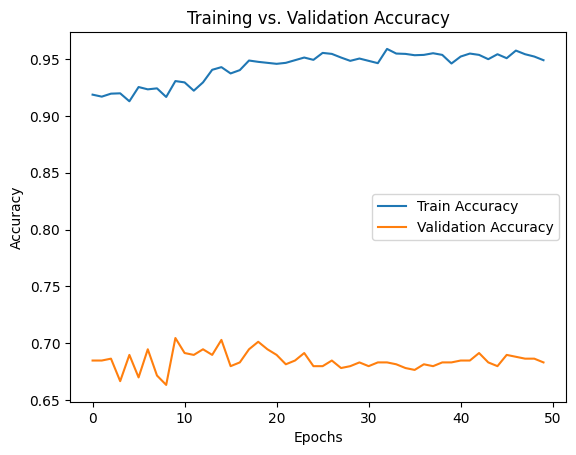

In [40]:
# Plot training & validation accuracy
plt.plot(history_m0.history['accuracy'], label='Train Accuracy')
plt.plot(history_m0.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Observation_LR[Reduced]
    Training Accuracy: 94%
    Validation Accuracy: 68%

    There is ahuge gap between 94% and 68%, which is showing overfitting data.

    Solutions:
    Early stopping or
    Dropout =0.5 or
    Data Augmentation
    VGG16, ResNet(Transfer learning)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [47]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [48]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [49]:
#Data augmentation parameters, the train datagen()- model fitting for above built models
datagen = ImageDataGenerator(rotation_range=20,         # Rotate images up to 20 degrees
                               width_shift_range=0.2,     # Shift images horizontally by up to 20% of the width
                               height_shift_range=0.2,    # Shift images vertically by up to 20% of the height
                               horizontal_flip=True,      # Randomly flip images
                               vertical_flip=False,        # Randomly flip images
                               zoom_range=0.2,               # Zoom up to 20%
                               fill_mode='nearest')        # Fill any missing pixels with the nearest value

# Fit augmentaionto training data
datagen.fit(X_train_norm)

In [50]:
# Intializing a sequential model
model_1 = Sequential()
model_1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model_1.add(MaxPooling2D((2, 2), padding='same'))

model_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_1.add(MaxPooling2D((2, 2), padding='same'))
model_1.add(BatchNormalization())

model_1.add(Flatten())
model_1.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_1.add(Dropout(0.35))

model_1.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_1.add(Dropout(0.35))

model_1.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))

model_1.add(Dense(12, activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [51]:
optimizer = Adam(learning_rate=0.001)
optimizer= keras.optimizers.Adam()
model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [52]:
# Fitting the model on the train data
history_1 = model_1.fit(datagen.flow(X_train_norm, y_train_en), validation_data=(X_val_norm, y_val_en), epochs=80, batch_size=32, verbose=2)

Epoch 1/80
108/108 - 43s - loss: 2.5271 - accuracy: 0.1160 - val_loss: 2.4567 - val_accuracy: 0.1403 - 43s/epoch - 401ms/step
Epoch 2/80
108/108 - 43s - loss: 2.2565 - accuracy: 0.2090 - val_loss: 2.2041 - val_accuracy: 0.2541 - 43s/epoch - 399ms/step
Epoch 3/80
108/108 - 42s - loss: 2.0926 - accuracy: 0.2521 - val_loss: 2.2181 - val_accuracy: 0.2310 - 42s/epoch - 392ms/step
Epoch 4/80
108/108 - 41s - loss: 2.0289 - accuracy: 0.2664 - val_loss: 3.2944 - val_accuracy: 0.1304 - 41s/epoch - 384ms/step
Epoch 5/80
108/108 - 43s - loss: 1.9808 - accuracy: 0.2827 - val_loss: 1.9638 - val_accuracy: 0.3251 - 43s/epoch - 396ms/step
Epoch 6/80
108/108 - 40s - loss: 1.9310 - accuracy: 0.2955 - val_loss: 1.8955 - val_accuracy: 0.3449 - 40s/epoch - 371ms/step
Epoch 7/80
108/108 - 43s - loss: 1.9042 - accuracy: 0.3025 - val_loss: 2.0330 - val_accuracy: 0.3086 - 43s/epoch - 396ms/step
Epoch 8/80
108/108 - 42s - loss: 1.8768 - accuracy: 0.3078 - val_loss: 1.8974 - val_accuracy: 0.3630 - 42s/epoch - 391

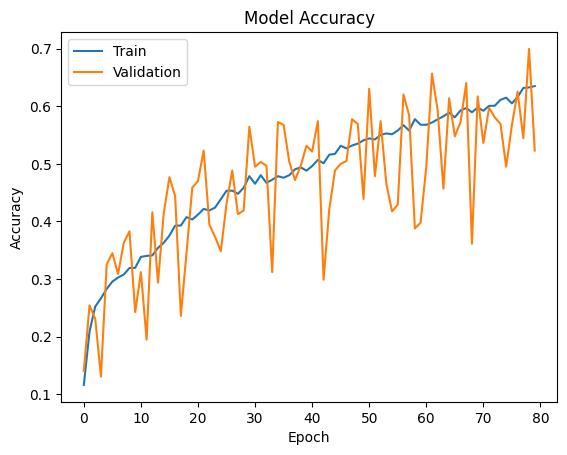

In [53]:
plt.plot(history_1.history['accuracy'], label ='accuracy')
plt.plot(history_1.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [54]:
#Evaluate model on test data
accuracy = model_1.evaluate(X_test_norm, y_test_en, verbose=2)

23/23 - 3s - loss: 1.4023 - accuracy: 0.5217 - 3s/epoch - 148ms/step


# Observations
    Total params: 547548
    Trainable params: 547484
    Non-trainable params: 64
    Training Accuracy: 63.5% and Validation Accuracy: 52%
_________________________________________

In [55]:
# Generate prediction using test data
y_pred_model_1 = model_1.predict(X_test_norm)
y_pred_model_1

23/23 [==============================] - 2s 61ms/step


array([[3.07157636e-01, 1.27885537e-03, 7.22459226e-04, ...,
        8.39767046e-04, 1.05755795e-02, 1.28139704e-01],
       [3.34467441e-01, 3.92740534e-04, 1.37407580e-04, ...,
        1.02603517e-03, 1.14017716e-02, 1.43000737e-01],
       [1.08947002e-04, 3.39562863e-01, 5.02232239e-02, ...,
        1.07904255e-01, 2.60926727e-02, 5.19072525e-02],
       ...,
       [1.76138148e-01, 1.04131740e-14, 2.70782525e-08, ...,
        8.77653363e-08, 9.21228249e-08, 6.40479702e-05],
       [2.47732805e-05, 1.32323446e-04, 7.96615218e-09, ...,
        2.70106465e-01, 6.32129684e-02, 6.29668823e-03],
       [2.56452966e-03, 3.06184106e-02, 1.02829188e-02, ...,
        1.63750052e-02, 7.93164670e-02, 6.06004119e-01]], dtype=float32)

In [56]:
# calculating categorical values from y_test_encoded and y_pred
y_pred_model_1=np.argmax(y_pred_model_1, axis=1)
y_test_arg=np.argmax(y_test_en, axis=1)

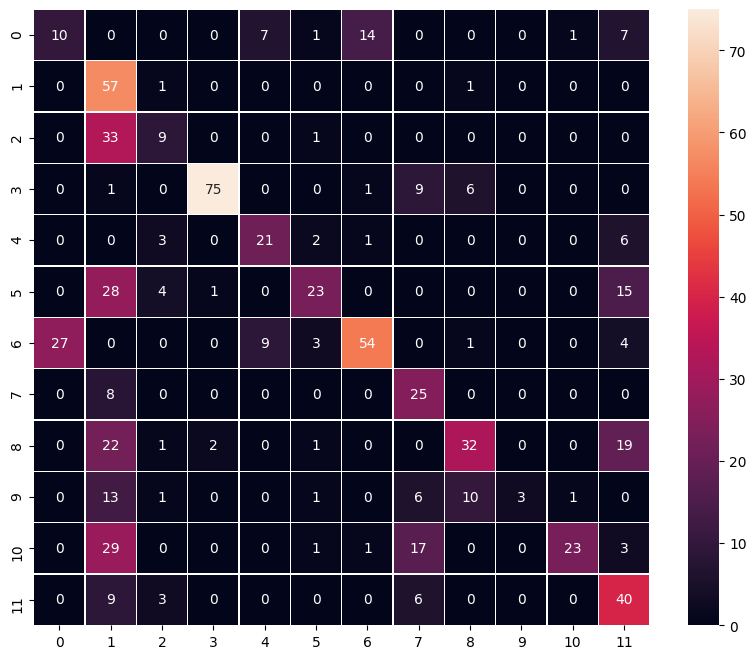

In [57]:
# Confusion matrix plot
cm1 = tf.math.confusion_matrix(y_test_arg,y_pred_model_1)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cm1,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Observation_Model_1

    The confusion matrix appears to be improving as well, however there is still some confusion between classes 0 and 6.
    For this model the 6 class is the most confused class among all.
    We can observe that this model has outperformed our previous model.

# Model_2 "Transfer Learning using VGG16"


In [66]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

In [67]:
vgg_model_2 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
vgg_model_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [68]:
# Freezing all non-trainable layers of the VGG model
for layer in vgg_model_2.layers:
    layer.trainable = False # Freeze initial layers


In [69]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [70]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [71]:
model_2 = Sequential()
model_2.add(vgg_model_2)        # Adding the convolutional part of the VGG16 model from above

model_2.add(Flatten())          # Flattening the output of the VGG16 model because it is from a convolutional layer

# Adding a dense output layer
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(32, activation= 'relu'))
model_2.add(Dense(12, activation='softmax'))

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1

In [72]:
# Optimizer = Adam
optimizer = Adam(learning_rate=0.001)
optimizer= keras.optimizers.Adam()
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [73]:
history_2_vgg = model_2.fit(datagen.flow(X_train_norm, y_train_en), validation_data=(X_val_norm, y_val_en), epochs=80, batch_size=32, verbose=2)

Epoch 1/80
108/108 - 228s - loss: 2.4422 - accuracy: 0.1317 - val_loss: 2.3624 - val_accuracy: 0.2145 - 228s/epoch - 2s/step
Epoch 2/80
108/108 - 209s - loss: 2.3325 - accuracy: 0.1967 - val_loss: 2.2095 - val_accuracy: 0.2888 - 209s/epoch - 2s/step
Epoch 3/80
108/108 - 220s - loss: 2.2169 - accuracy: 0.2308 - val_loss: 2.1207 - val_accuracy: 0.3251 - 220s/epoch - 2s/step
Epoch 4/80
108/108 - 219s - loss: 2.1129 - accuracy: 0.2539 - val_loss: 2.0150 - val_accuracy: 0.2838 - 219s/epoch - 2s/step
Epoch 5/80
108/108 - 217s - loss: 2.0534 - accuracy: 0.2568 - val_loss: 1.9431 - val_accuracy: 0.3234 - 217s/epoch - 2s/step
Epoch 6/80
108/108 - 215s - loss: 2.0131 - accuracy: 0.2734 - val_loss: 1.8755 - val_accuracy: 0.3251 - 215s/epoch - 2s/step
Epoch 7/80
108/108 - 217s - loss: 1.9715 - accuracy: 0.2754 - val_loss: 1.8713 - val_accuracy: 0.3350 - 217s/epoch - 2s/step
Epoch 8/80
108/108 - 217s - loss: 1.9563 - accuracy: 0.2848 - val_loss: 1.8471 - val_accuracy: 0.3267 - 217s/epoch - 2s/step


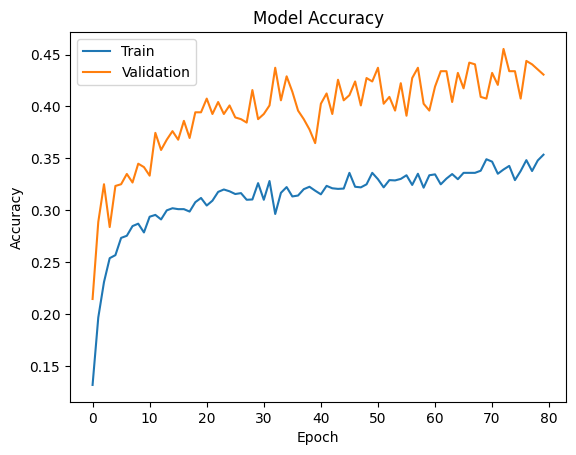

In [74]:
plt.plot(history_2_vgg.history['accuracy'], label='accuracy')
plt.plot(history_2_vgg.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [75]:
#Evaluate model on test data
accuracy = model_2.evaluate(X_test_norm, y_test_en,verbose=2)

23/23 - 42s - loss: 1.6775 - accuracy: 0.4095 - 42s/epoch - 2s/step


In [76]:
y_pred_model_2 = model_2.predict(X_test_norm)
y_pred_model_2

23/23 [==============================] - 39s 2s/step


array([[2.0725013e-01, 7.4316185e-06, 5.8204522e-03, ..., 3.7035545e-05,
        2.7955743e-08, 3.6192596e-02],
       [2.1365340e-01, 5.3448261e-06, 5.0839977e-03, ..., 3.0874788e-05,
        1.8147832e-08, 3.3014901e-02],
       [1.6021667e-03, 7.1375822e-03, 2.0792002e-02, ..., 1.0855121e-01,
        3.7777141e-02, 1.0917811e-01],
       ...,
       [2.2186142e-01, 1.7888330e-07, 1.7035463e-03, ..., 5.1581760e-06,
        2.3603508e-10, 1.8111343e-02],
       [1.0151778e-03, 9.8999180e-02, 4.7478113e-02, ..., 8.3917364e-02,
        2.6382962e-01, 1.0189298e-01],
       [1.0080682e-02, 2.4475615e-02, 7.8550130e-02, ..., 5.3105760e-02,
        2.8999211e-02, 2.0340212e-01]], dtype=float32)

In [77]:
# calculating categorical values from y_test_encoded and y_pred
y_pred_model_2=np.argmax(y_pred_model_2, axis=1)
y_test_arg=np.argmax(y_test_en, axis=1)

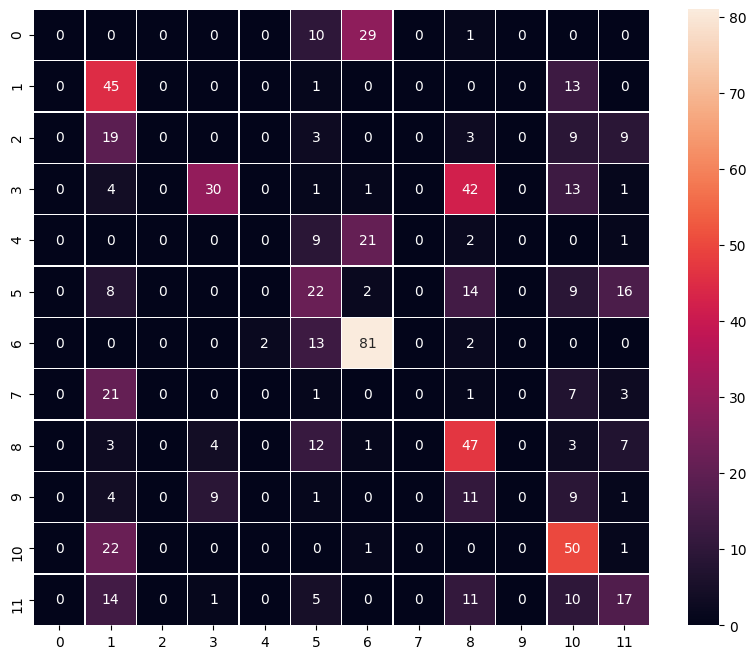

In [78]:
# Confusion matrix plot
cm2 = tf.math.confusion_matrix(y_test_arg,y_pred_model_2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cm2,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

### Visualizing the prediction

## Actionable Insights and Business Recommendations

*

_____